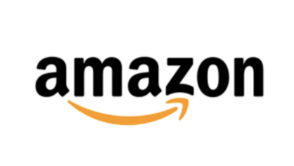

# **Impact of Discounts on Amazon Sales & Customer Analysis**

## **Background**
Amazon is one of the largest e-commerce platforms, offering a wide range of products with frequent discounts and promotions. However, despite providing significant discounts across various categories, data suggests that **higher discounts do not always result in better customer satisfaction**. Some products with bigger discounts still receive **lower ratings**, which raises important questions about:
- **Customer perception** of discounted products  
- **Product quality concerns** at higher discount rates  
- **Purchasing behavior** and its relationship with discount strategies  

Additionally, Amazon wants to **optimize its discount strategies** for high-ticket items (expensive products) to ensure that customers are satisfied with their purchases. The company also needs insights into:
- **Which product categories benefit the most from discounts**  
- **How customer feedback can improve overall sales and shopping experiences**  

This analysis will help Amazon make **data-driven decisions** to enhance customer satisfaction and maximize revenue.


# [Written Report](https://www.canva.com/design/DAGhThkQ3Ho/UNxnfYbzY6uiMx2ZdvXCDw/edit?utm_content=DAGhThkQ3Ho&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton )

## 1. Importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/BA course/Project/amazon.csv')

## 2. Data Cleaning and Preparation

**Steps to consider: **
- Data cleaning (missing values, outliers)
- Data check (data type, inconsistency)
- Data Transformation (create necessary columns for futher analysis)

# **Data Cleaning**

In [ ]:
dataset.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
print(f"The Number of Rows are {dataset.shape[0]}, and columns are {dataset.shape[1]}.")

The Number of Rows are 1465, and columns are 16.




*   There are 15 columns and 1465 rows in the dataset
*   Data type of all columns is object
*   Column: 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
*   We need to change the datatype of: 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'



In [ ]:
# Replace datatype of 'discounted_price', 'actual_price' and 'discount_percentage'
dataset['discounted_price'] = dataset['discounted_price'].str.replace('₹', '')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(',', '')
dataset['discounted_price'] = dataset['discounted_price'].astype(float)

dataset['actual_price'] = dataset['actual_price'].str.replace('₹', '')
dataset['actual_price'] = dataset['actual_price'].str.replace(',', '')
dataset['actual_price'] = dataset['actual_price'].astype(float)

dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%', '').astype(float)
dataset['discount_percentage'] = dataset['discount_percentage'] / 100

dataset['rating_count'] = dataset['rating_count'].str.replace(',', '').astype(float)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
# Check the rating column
dataset['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [ ]:
dataset.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


As there is only 1 outlier, which is '|', I would suggest to drop that row, hence, it might lead to bias in further analysis.

In [ ]:
# Clean and reformat the datatype of 'rating'
dataset = dataset[dataset['rating'] != '|']
dataset['rating'] = dataset['rating'].astype(float)


# Check the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

<ipython-input-10-e6d5492e825a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['rating'] = dataset['rating'].astype(float)


Now, there are 15 columns and only 1464 entries instead of 1465.

In [ ]:
# Check if there is any duplications in the dataset
dataset.duplicated().sum()

0

In [ ]:
# Check if there is any missing values left in the dataset
dataset.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


# **Data Transformation**

In [ ]:
# Create a new dataframe with selected columns
df1 = dataset[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'review_content']].copy()

# Split the Strings in the category column
catsplit = dataset['category'].str.split('|', expand=True)

# Rename the category column
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})
catsplit

,category_1,category_2,category_3,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [ ]:
# Add categories to the new dataframe

df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_content,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,"Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,"I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,"ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,"plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,I have installed this in my kitchen working fi...,Home&Kitchen,"Heating,Cooling&AirQuality"


In [ ]:
# Check category_1 unique values

df1['category_1'].value_counts()

,count
category_1,
Electronics,526
Computers&Accessories,453
Home&Kitchen,447
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [ ]:
# Fix Strings in the Category_1 Column

df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [ ]:
# Check category_2 unique values

df1['category_2'].value_counts()

,count
category_2,
Accessories&Peripherals,381
Kitchen&HomeAppliances,307
"HomeTheater,TV&Video",162
Mobiles&Accessories,161
"Heating,Cooling&AirQuality",116
WearableTechnology,76
"Headphones,Earbuds&Accessories",66
NetworkingDevices,34
OfficePaperProducts,27


In [ ]:
#Fixing Strings in Category_2 column

df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')


# Removing Whitespace from product_id
df1['product_id'].str.strip()

,product_id
0,B07JW9H4J1
1,B098NS6PVG
2,B096MSW6CT
3,B08HDJ86NZ
4,B08CF3B7N1
...,...
1460,B08L7J3T31
1461,B01M6453MB
1462,B009P2LIL4
1463,B00J5DYCCA


In [ ]:
#Creating Categories for Rankings

rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

Now we have created a a Rating Category that consists of:

1. Score below 2.0 = Poor

2. Score range of 2.0 - 2.9 = Below Average

3. Score range of 3.0 - 3.9 = Average

4. Score Range of 4.0 - 4.9 = Above Average

5. Score of 5.0 = Excellent

In [ ]:
# Create A new Column and Changing the Data Type

df1['rating_score'] = rating_score

df1['rating_score'] = df1['rating_score'].astype('category')

In [ ]:
# Reordered Categories

df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [ ]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [ ]:
# Check the cleaned dataset
df1.head(10)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_content,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.00,1099.0,0.64,4.2,24269.0,Looks durable Charging is fine tooNo complains...,Computers & Accessories,Accessories & Peripherals,Above Average,700.00
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.00,349.0,0.43,4.0,43994.0,I ordered this cable to connect my phone to An...,Computers & Accessories,Accessories & Peripherals,Above Average,150.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.00,1899.0,0.90,3.9,7928.0,"Not quite durable and sturdy,https://m.media-a...",Computers & Accessories,Accessories & Peripherals,Average,1700.00
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.00,699.0,0.53,4.2,94363.0,"Good product,long wire,Charges good,Nice,I bou...",Computers & Accessories,Accessories & Peripherals,Above Average,370.00
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.00,399.0,0.61,4.2,16905.0,"Bought this instead of original apple, does th...",Computers & Accessories,Accessories & Peripherals,Above Average,245.00
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,149.00,1000.0,0.85,3.9,24871.0,"It's a good product.,Like,Very good item stron...",Computers & Accessories,Accessories & Peripherals,Average,851.00
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",176.63,499.0,0.65,4.1,15188.0,Build quality is good and it is comes with 2 y...,Computers & Accessories,Accessories & Peripherals,Above Average,322.37
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),229.00,299.0,0.23,4.3,30411.0,Worth for money - suitable for Android auto......,Computers & Accessories,Accessories & Peripherals,Above Average,70.00
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",499.00,999.0,0.50,4.2,179691.0,I use this to connect an old PC to internet. I...,Computers & Accessories,Networking Devices,Above Average,500.00
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.00,299.0,0.33,4.0,43994.0,I ordered this cable to connect my phone to An...,Computers & Accessories,Accessories & Peripherals,Above Average,100.00


In [ ]:
# Group 'Office Products' and 'Musical Instruments' into 'Others'
df1["category_grouped"] = df1["category_1"].replace({"OfficeProducts": "Others",
                                                     "MusicalInstruments": "Others",
                                                     "HomeImprovement": "Others",
                                                     "Toys & Games": "Others",
                                                     "Car & Motorbike": "Others",
                                                     "Health & PersonalCare": "Others"})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1464 non-null   object  
 1   product_name         1464 non-null   object  
 2   discounted_price     1464 non-null   float64 
 3   actual_price         1464 non-null   float64 
 4   discount_percentage  1464 non-null   float64 
 5   rating               1464 non-null   float64 
 6   rating_count         1462 non-null   float64 
 7   review_content       1464 non-null   object  
 8   category_1           1464 non-null   object  
 9   category_2           1464 non-null   object  
 10  rating_score         1464 non-null   category
 11  difference_price     1464 non-null   float64 
 12  category_grouped     1464 non-null   object  
dtypes: category(1), float64(6), object(6)
memory usage: 150.3+ KB


## 3. Data analysis

# **Observation 1: Company background**

<ipython-input-26-d30a2ba19e60>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], data=most_main_items, x='amounts', y='category_1', palette=colors_main)
<ipython-input-26-d30a2ba19e60>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], data=most_sub_items, x='amounts', y='category_2', palette=colors_sub)


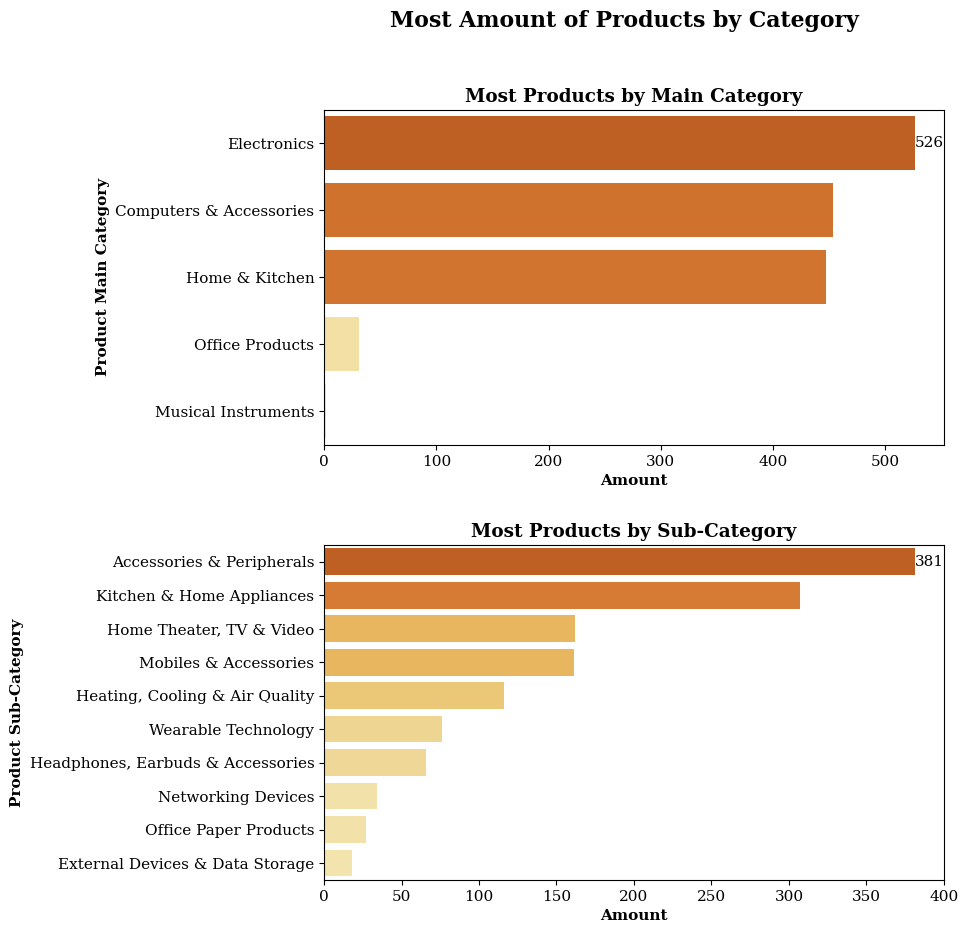

In [ ]:
# Set global font properties
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'

# Most amount of products by category
most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='amounts')
most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='amounts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

# Use "YlOrBr" colormap with a restricted yellow range
cmap = plt.get_cmap("YlOrBr")

# Normalize the values and extract only the yellow-orange range
norm_main = plt.Normalize(vmin=min(most_main_items['amounts']), vmax=max(most_main_items['amounts']))
colors_main = [cmap(0.2 + 0.5 * norm_main(val)) for val in most_main_items['amounts']]  # Adjust to limit browns

norm_sub = plt.Normalize(vmin=min(most_sub_items['amounts']), vmax=max(most_sub_items['amounts']))
colors_sub = [cmap(0.2 + 0.5 * norm_sub(val)) for val in most_sub_items['amounts']]  # Adjust to limit browns

# Create bar plots with adjusted yellow tones
sns.barplot(ax=ax[0], data=most_main_items, x='amounts', y='category_1', palette=colors_main)
sns.barplot(ax=ax[1], data=most_sub_items, x='amounts', y='category_2', palette=colors_sub)

plt.subplots_adjust(hspace=0.3)


# Set labels and titles
ax[0].set_xlabel('Amount', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_xlabel('Amount', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')

# Add labels to bars
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

# Show the plot
plt.show()


*   **Electronics, Computers & Accessories, and Home & Kitchen** are the top three most stocked product categories, while the Office Products and Musical Instruments have significantly fewer products, indicating lower inventory or niche demand.
*   The dominance of Electronics and Computers & Accessories suggests that these categories have higher consumer demand or more frequent product listings.
*   In terms of Sub-Category, **Accessories & Peripherals and Kitchen & Home Appliances** have the most product listings, meaning they are high-demand segments.

In [ ]:
# Calculate the average discount percentage after cleaning
average_discount = df1['discount_percentage'].mean()
print(f"The average discount percentage: {average_discount:.2%}.")

df1["discount_percentage"] = pd.to_numeric(df1["discount_percentage"], errors="coerce")
category_discount_means = df1.groupby("category_1")[["discount_percentage"]].mean()
category_discount_means_sorted = category_discount_means.sort_values(by="discount_percentage", ascending=False)
print(category_discount_means_sorted)
print()
print()


# Calculate the average rating after cleaning
average_rating = df1['rating'].mean()
print(f"The average rating: {average_rating:.2}.")

df1["rating"] = pd.to_numeric(df1["rating"], errors="coerce")
category_rating_means = df1.groupby("category_1")[["rating"]].mean()
category_rating_means_sorted = category_rating_means.sort_values(by="rating", ascending=False)
print(category_rating_means_sorted)

The average discount percentage: 47.71%.
                         discount_percentage
category_1                                  
Home Improvement                    0.575000
Computers & Accessories             0.540243
Health & PersonalCare               0.530000
Electronics                         0.508289
Musical Instruments                 0.460000
Car & Motorbike                     0.420000
Home & Kitchen                      0.401745
Office Products                     0.123548
Toys & Games                        0.000000


The average rating: 4.1.
                           rating
category_1                       
Office Products          4.309677
Toys & Games             4.300000
Home Improvement         4.250000
Computers & Accessories  4.154967
Electronics              4.081749
Home & Kitchen           4.040716
Health & PersonalCare    4.000000
Musical Instruments      3.900000
Car & Motorbike          3.800000


<ipython-input-28-f8b3764de607>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_discount_means_sorted["discount_percentage"],
<ipython-input-28-f8b3764de607>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating_means_sorted["rating"],


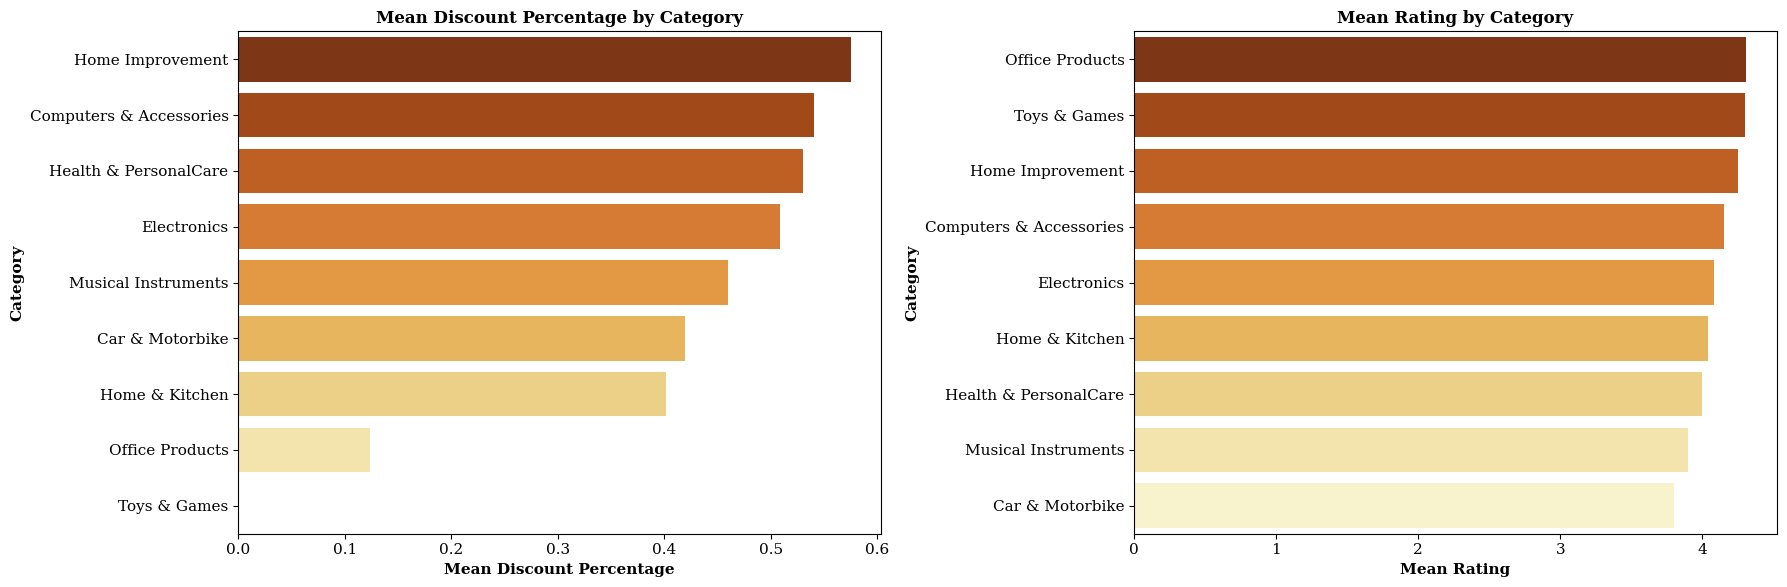

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for mean discount percentage by category (Left side)
sns.barplot(x=category_discount_means_sorted["discount_percentage"],
            y=category_discount_means_sorted.index,
            ax=axes[0],
            palette="YlOrBr_r")

axes[0].set_title("Mean Discount Percentage by Category", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Mean Discount Percentage", fontweight = "bold")
axes[0].set_ylabel("Category", fontweight = "bold")




# Bar chart for mean rating by category (Right side)
sns.barplot(x=category_rating_means_sorted["rating"],
            y=category_rating_means_sorted.index,
            ax=axes[1],
            palette="YlOrBr_r")

axes[1].set_title("Mean Rating by Category", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Mean Rating", fontweight = "bold")
axes[1].set_ylabel("Category", fontweight = "bold")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# **Observation 2: Discount Percentage impacts on other features**

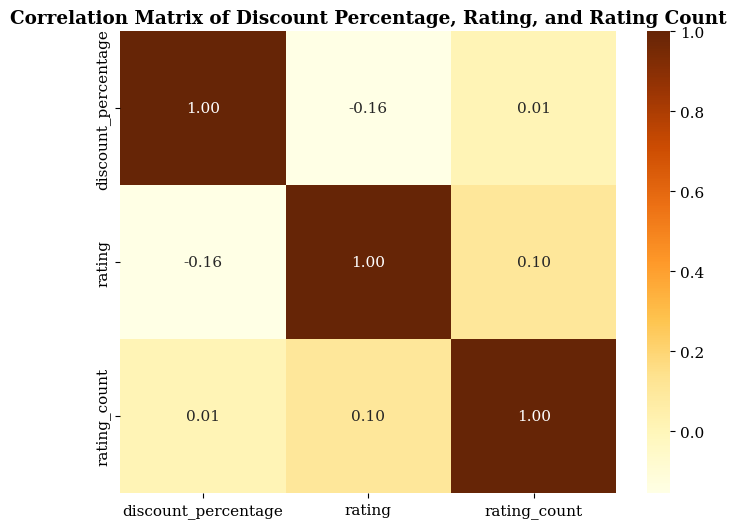

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1[['discount_percentage', 'rating', 'rating_count']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix of Discount Percentage, Rating, and Rating Count', fontweight = "bold")
plt.show()

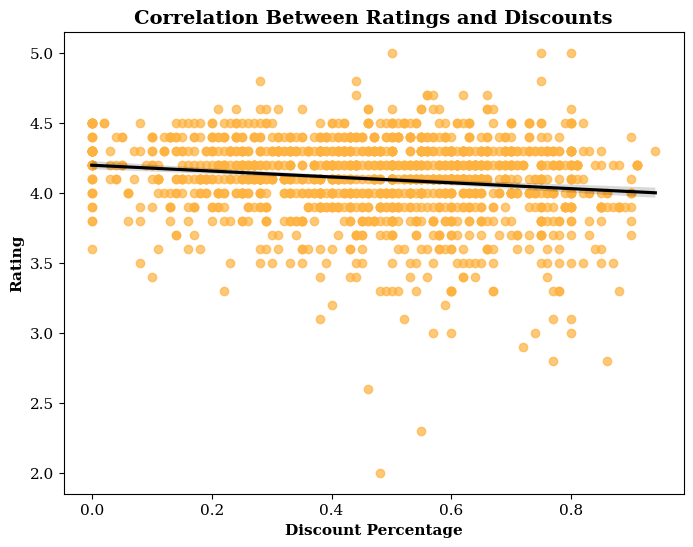

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Choose a color from the "YlOrBr" colormap
color = sns.color_palette("YlOrBr", n_colors=6)[2]

# Scatter plot with all points in yellow
plt.scatter(df1['discount_percentage'], df1['rating'], color=color, alpha=0.7)

# Regression line (Seaborn handles it)
sns.regplot(
    x='discount_percentage',
    y='rating',
    data=df1,
    scatter=False,  # Only draw regression line
    line_kws={"color": "black"}  # Keep regression line black
)

# Set title and labels with bold font
plt.title('Correlation Between Ratings and Discounts', fontweight='bold', fontsize=14)
plt.xlabel('Discount Percentage', fontweight='bold')
plt.ylabel('Rating', fontweight='bold')

# Show plot
plt.show()


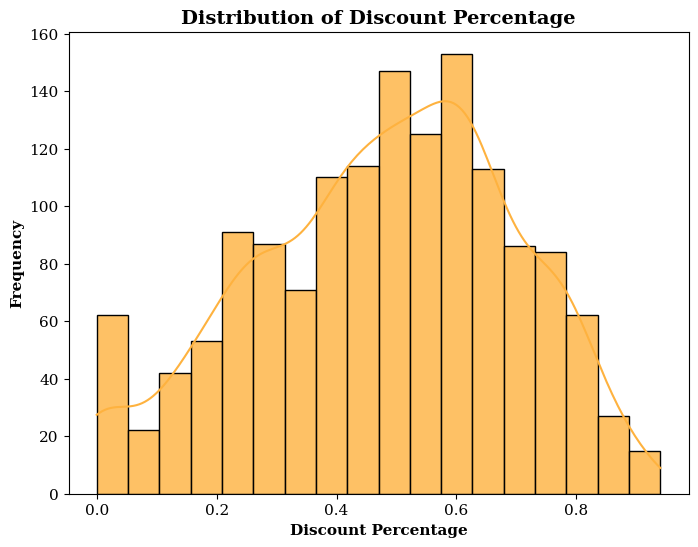

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Choose a color from the "YlOrBr" colormap
color = sns.color_palette("YlOrBr", n_colors=6)[2]  # Pick a middle shade (index 2)

# Create histogram with chosen color
sns.histplot(df1['discount_percentage'], kde=True, color=color, alpha=0.8)

# Set title and labels with bold font
plt.title('Distribution of Discount Percentage', fontweight='bold', fontsize=14)
plt.xlabel('Discount Percentage', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

# Show plot
plt.show()



*   Most purchases occur in the 40-70% discount range.
*   The number of purchases starts to decline beyond 80% discounts, possibly due to concerns about quality or limited availability.



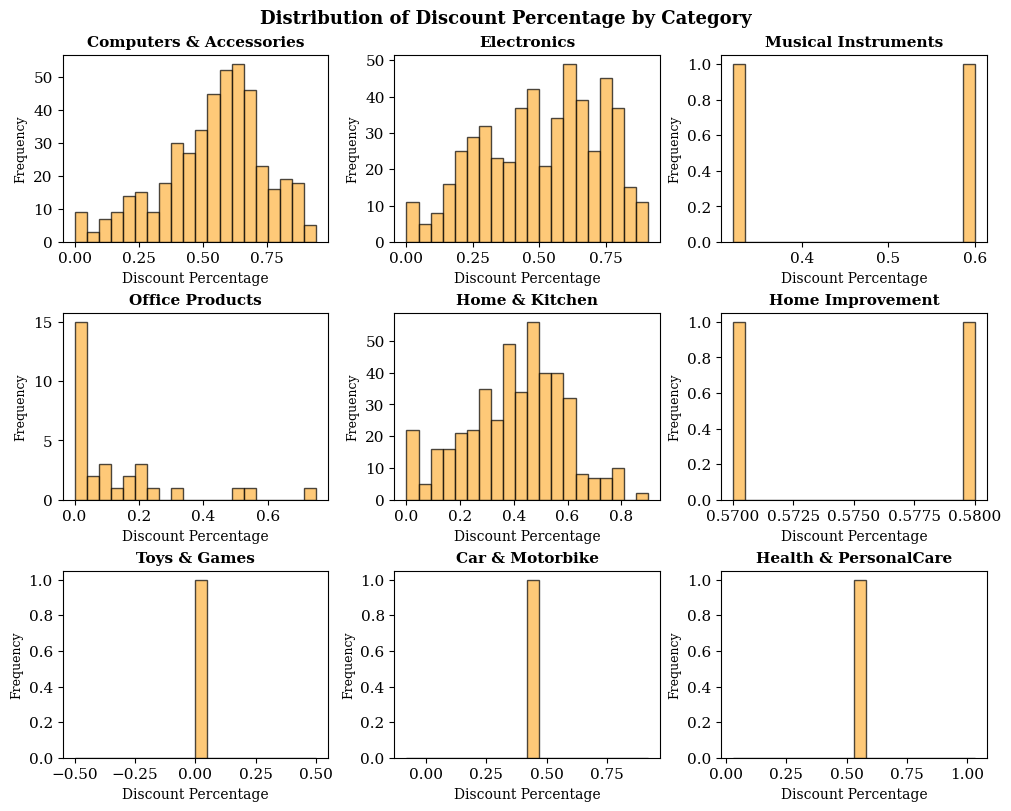

In [ ]:
# Apply font size and family
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'

# Set up the figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

# Get unique categories
categories = df1["category_1"].unique()

# Plot histogram for each category
for i, category in enumerate(categories):
    subset = df1[df1["category_1"] == category]["discount_percentage"]
    axes[i].hist(subset, bins=20, alpha=0.7, edgecolor='black', color=color)
    axes[i].set_title(category, fontsize=11, fontweight = 'bold')
    axes[i].set_xlabel("Discount Percentage", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Remove empty subplots if categories are fewer than grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot with a formatted title
plt.suptitle("Distribution of Discount Percentage by Category", fontsize=13, fontweight="bold", fontfamily='serif')

plt.show()


*   Categories with wider distributions (e.g., Computers & Accessories, Electronics, Home & Kitchen) have more varied discounts.
*   Categories with narrow distributions (e.g., Toys & Games, Car & Motorbike, Health & Personal Care) have discount percentages clustered around specific values.
*   Categories with fewer data points may show sparse distributions or single-bar histograms.


# **Observation 3: Rating impacts on customer buying perception**

In [ ]:
# Calculate the average discount percentage after cleaning
average_discount = df1['discount_percentage'].mean()
highest_discount = df1["discount_percentage"].max()
lowest_discount = df1["discount_percentage"].min()
print(f"The average discount percentage: {average_discount:.2%}.")
print(f"The highest discount percentage: {highest_discount:.2%}.")
print(f"The lowest discount percentage: {lowest_discount:.2%}.")


df1["discount_percentage"] = pd.to_numeric(df1["discount_percentage"], errors="coerce")
category_discount_means = df1.groupby("category_1")[["discount_percentage", "rating_count"]].mean()
category_discount_means_sorted = category_discount_means.sort_values(by="discount_percentage", ascending=False)
print(category_discount_means_sorted)

The average discount percentage: 47.71%.
The highest discount percentage: 94.00%.
The lowest discount percentage: 0.00%.
                         discount_percentage  rating_count
category_1                                                
Home Improvement                    0.575000   4283.000000
Computers & Accessories             0.540243  17136.782705
Health & PersonalCare               0.530000   3663.000000
Electronics                         0.508289  29997.809886
Musical Instruments                 0.460000  44441.000000
Car & Motorbike                     0.420000   1118.000000
Home & Kitchen                      0.401745   6689.210291
Office Products                     0.123548   4828.225806
Toys & Games                        0.000000  15867.000000


<ipython-input-34-e87a0a4b1111>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_summary['category_1'], rotation=45, ha='right')
<ipython-input-34-e87a0a4b1111>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_discount_means_sorted["discount_percentage"],


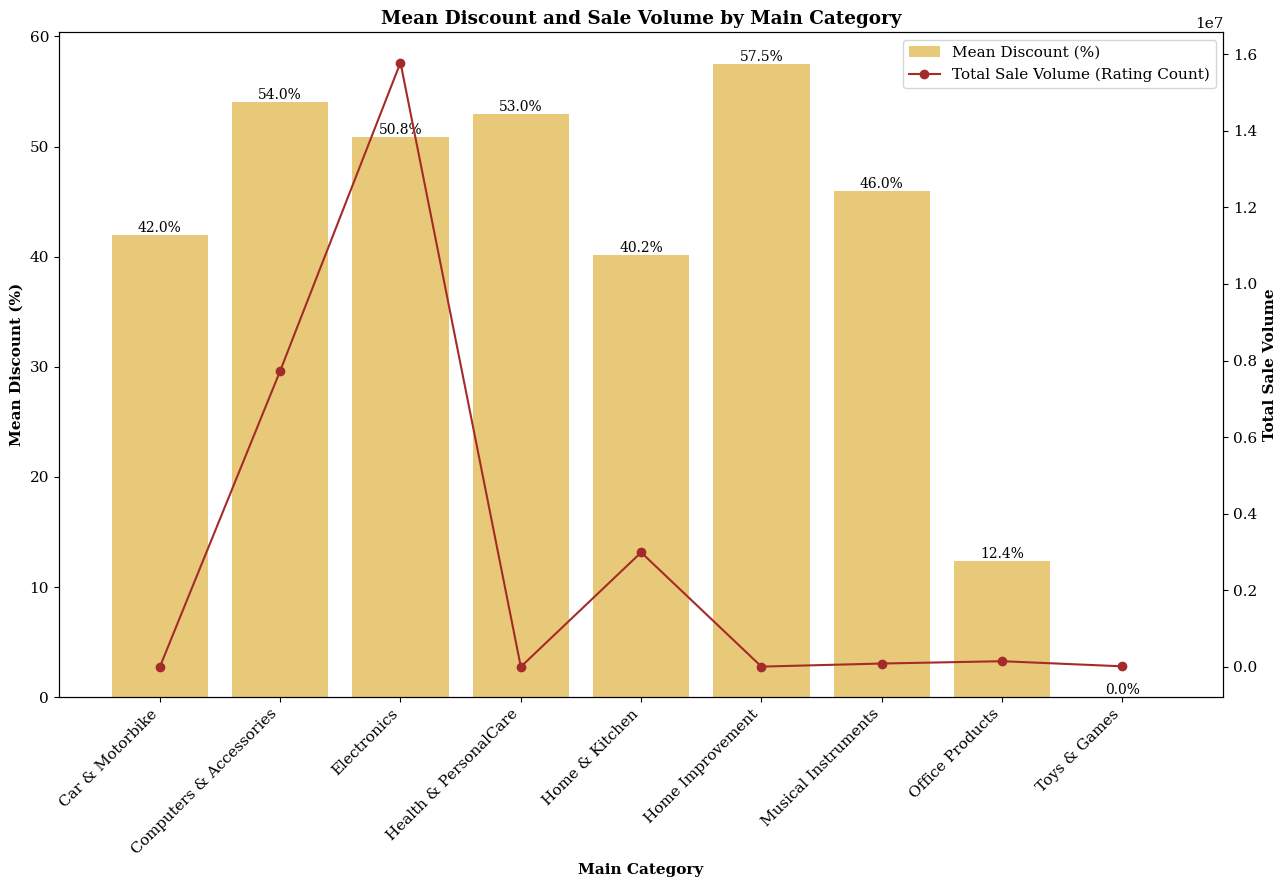

In [ ]:
# Display the category_summary dataframe again for clarity
category_summary = df1.groupby('category_1').agg({
    'discount_percentage': 'mean',
    'rating_count': 'sum'
}).reset_index()

# Create a dual-axis bar chart with percentage labels
fig, ax1 = plt.subplots(figsize=(13, 9))

# Plot mean discount percentage
bars = ax1.bar(category_summary['category_1'], category_summary['discount_percentage']*100, alpha=0.6, label='Mean Discount (%)', color='goldenrod')
ax1.set_ylabel('Mean Discount (%)', color='black', fontweight = "bold")
ax1.set_xlabel('Main Category', fontweight ="bold")
ax1.set_xticklabels(category_summary['category_1'], rotation=45, ha='right')


sns.barplot(x=category_discount_means_sorted["discount_percentage"],
            y=category_discount_means_sorted.index,
            ax=axes[0],
            palette="YlOrBr_r")


# Add percentage labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Create a second y-axis for rating count
ax2 = ax1.twinx()
ax2.plot(category_summary['category_1'], category_summary['rating_count'], marker='o', linestyle='-', color='brown', label='Total Sale Volume (Rating Count)')
ax2.set_ylabel('Total Sale Volume', color='black', fontweight ="bold")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')


# Title and legend
plt.title('Mean Discount and Sale Volume by Main Category', fontweight = "bold")
fig.tight_layout()
plt.show()


In [ ]:
# Rating of Products based on Rating Category

rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat.sort_values(by='Amount', ascending=False)

<ipython-input-50-59528b2f8222>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')


,Main Category,Rating Category,Amount
10,Electronics,Above Average,393
6,Computers & Accessories,Above Average,375
18,Home & Kitchen,Above Average,303
17,Home & Kitchen,Average,139
9,Electronics,Average,132
5,Computers & Accessories,Average,75
30,Office Products,Above Average,31
16,Home & Kitchen,Below Average,5
7,Computers & Accessories,Excellent,3
22,Home Improvement,Above Average,2


<ipython-input-49-e913bd89ecff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_category_distribution = df1.groupby(['rating_score', 'category_1']).size().reset_index(name='Count')


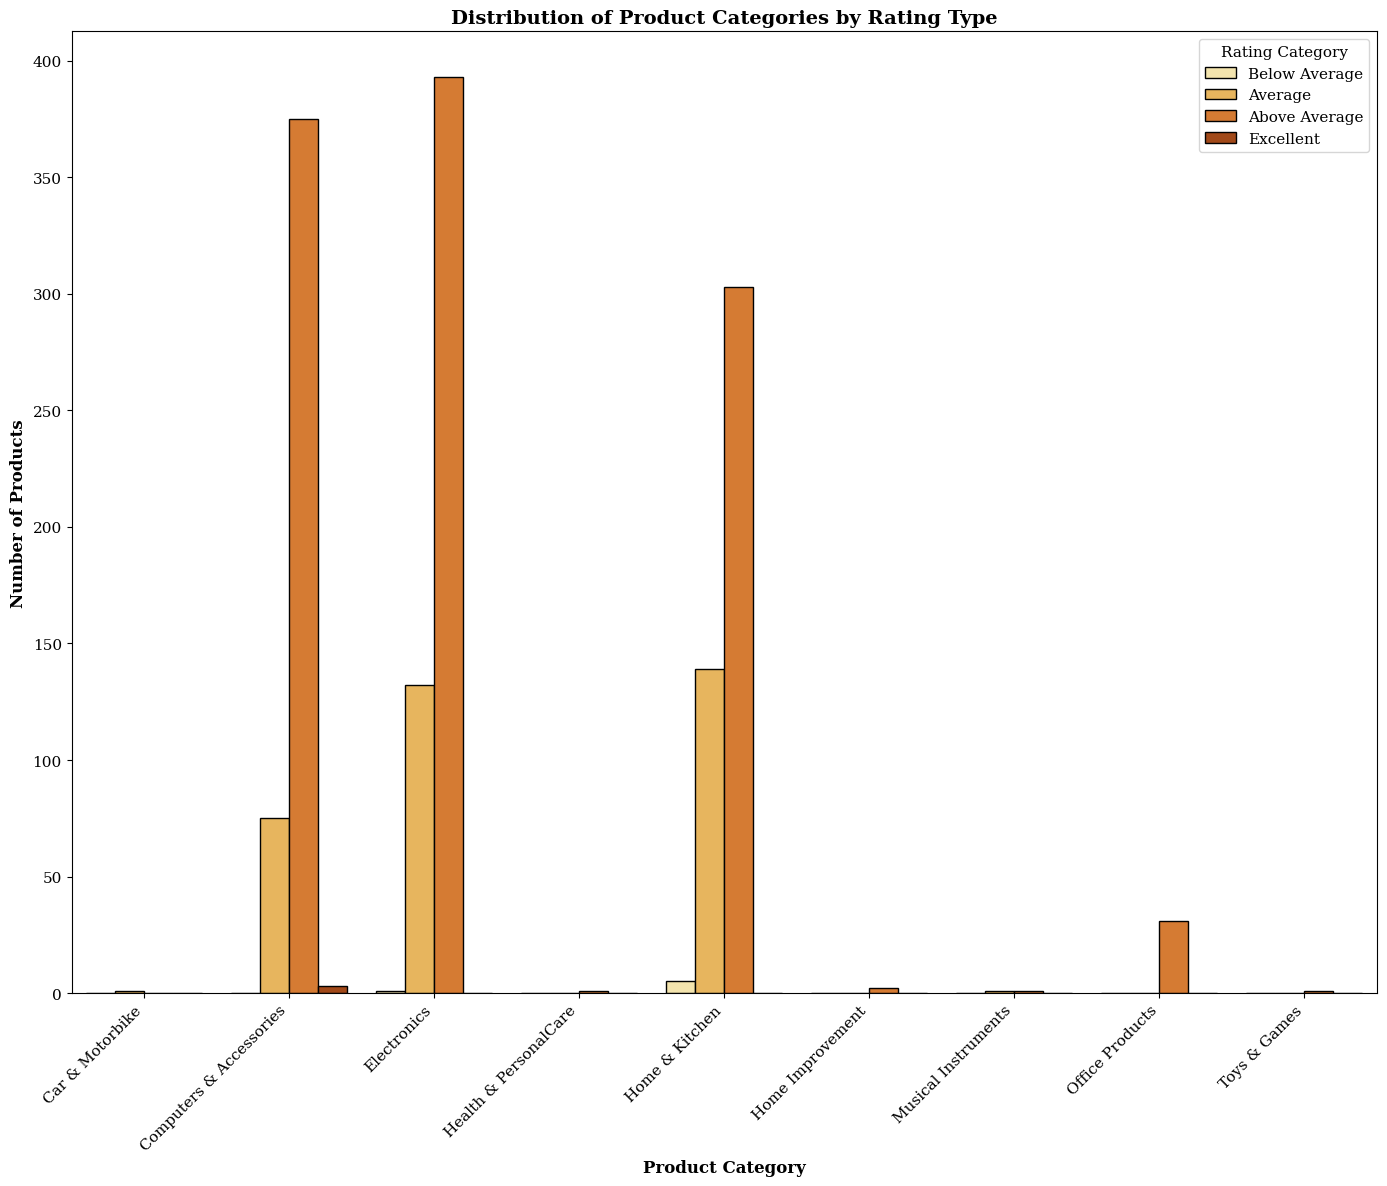

In [ ]:
# Group by rating category and main product category
rating_category_distribution = df1.groupby(['rating_score', 'category_1']).size().reset_index(name='Count')

# Create a grouped bar chart to visualize the rating distribution across product categories
plt.figure(figsize=(14, 12))
sns.barplot(data=rating_category_distribution, x='category_1', y='Count', hue='rating_score',
            palette='YlOrBr', edgecolor='black')

# Labels and title
plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Products', fontsize=12, fontweight='bold')
plt.title('Distribution of Product Categories by Rating Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating Category')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# import wordcloud
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

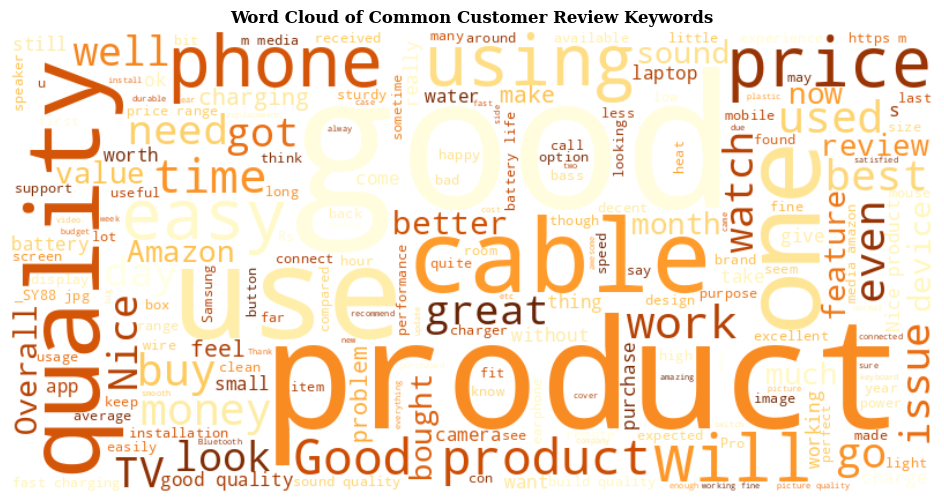

In [ ]:
# Combine all customer reviews into one large text string
review_text = " ".join(df1["review_content"].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(review_text)

# Generate the word cloud with the YlOrBr colormap
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="YlOrBr").generate(review_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Common Customer Review Keywords", fontweight="bold", size=12)
plt.show()

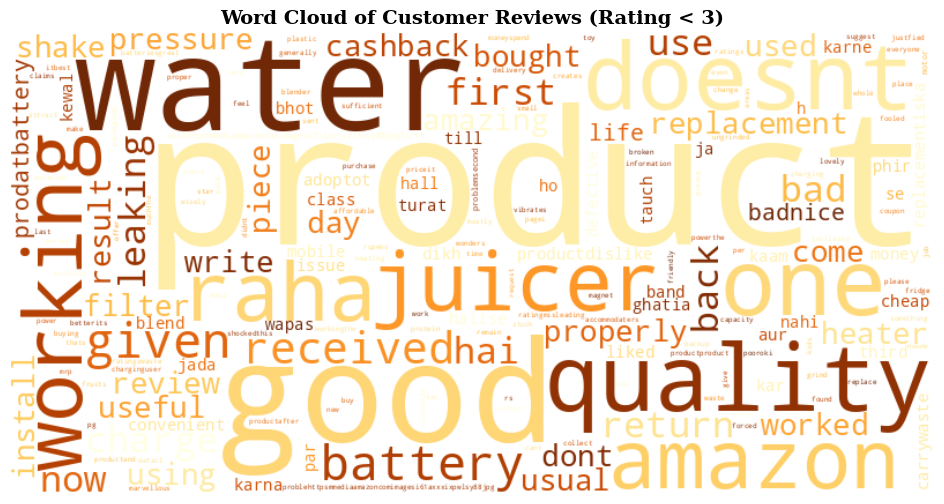

In [ ]:
import re
from wordcloud import STOPWORDS

# Filter reviews where the rating is under 3
low_rating_reviews = df1[df1['rating'] < 3]['review_content']

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip().lower()  # Convert to lowercase and trim spaces

# Apply text cleaning
cleaned_reviews = low_rating_reviews.astype(str).apply(clean_text)

# Combine all cleaned reviews into one large text string
low_rating_text = " ".join(cleaned_reviews)

# Generate the word cloud without rectangles
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="YlOrBr", stopwords=STOPWORDS).generate(low_rating_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Customer Reviews (Rating < 3)", fontsize=14, fontweight="bold")
plt.show()


# **Observation 4: High ticket item**

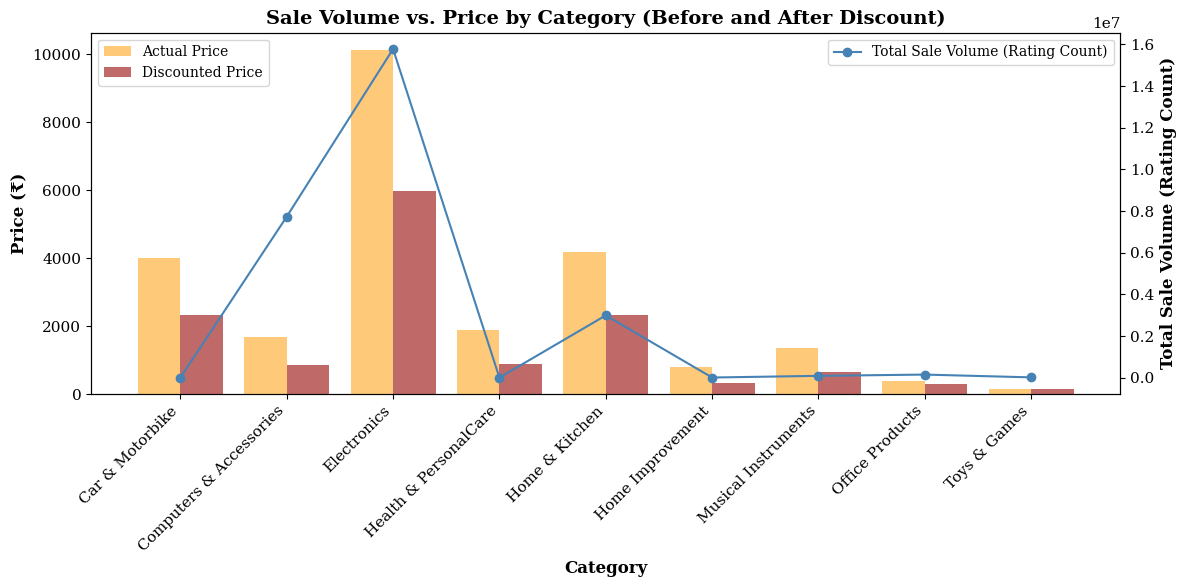

In [ ]:
# Extract main category
df1['category_1'] = df1['category_1'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

# Aggregate the data by category
category_price_summary = df1.groupby('category_1').agg({
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'rating_count': 'sum'
}).reset_index()

# Create a dual-axis chart to visualize sale volume vs. price before and after discount
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for actual and discounted price
bar_width = 0.4
x = range(len(category_price_summary))

bars1 = ax1.bar([i - bar_width/2 for i in x], category_price_summary['actual_price'], width=bar_width, label='Actual Price', color=color, alpha=0.7)
bars2 = ax1.bar([i + bar_width/2 for i in x], category_price_summary['discounted_price'], width=bar_width, label='Discounted Price', color='brown', alpha=0.7)

ax1.set_ylabel('Price (₹)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Category', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(category_price_summary['category_1'], rotation=45, ha='right')
ax1.legend(loc='upper left', fontsize=10)

# Create a second y-axis for rating count
ax2 = ax1.twinx()
ax2.plot(x, category_price_summary['rating_count'], marker='o', linestyle='-', color='steelblue', label='Total Sale Volume (Rating Count)')
ax2.set_ylabel('Total Sale Volume (Rating Count)', color='black', fontsize=12, fontweight='bold')

# Add legends
ax2.legend(loc='upper right', fontsize=10)

# Title and layout adjustments
plt.title('Sale Volume vs. Price by Category (Before and After Discount)', fontsize=14, fontweight='bold')
fig.tight_layout()

# Show plot
plt.show()


## 4. Key Insights & Recommendations

- Summarize findings and provide actionable recommendations for Amazon’s discount strategies.
- Suggest improvements based on data-driven conclusions.
- Highlight potential optimizations for pricing and marketing strategies.



# **Key Insights**

**Customer perception of discounted products**
*   Most products receive discounts between 40% and 80%, with a peak around 50-70%.
*   The number of purchases starts to decline beyond 80% discounts, possibly due to concerns about quality or limited availability.
*   The discount strategy is not the main factor leading to high sale volume.


**Product quality concerns at higher discount rates**
*  There is no clear correlation between the Discount and Rating. However, while the Discount Percentage increase, there is a slight drop in Rating.
Highest rate (5.0) and lowest rate (2.0) fall in the same discount range (40-60% off).
*  There is no strong trend showing that higher discount would lead to higher rating.
=> Discount itself does not influence customer satisfaction (including the quality)

**Discount and Rating Trends Across Product Categories**
*   **Computer & Accessories, and Electronics** are the most stocked product categories.
*   Categories like **Electronics and Accessories** seem to have a higher median discount, whereas other categories have more varied discount distributions.
*    Many of the **Computer & Accessories, and Electronics** products have ratings in the range of 3.6 - 4.6. Though these categories do have products that have a high rating such as 5.0 and low rating, going down to 2.75.

**How customer feedback can improve overall sales and shopping experiences**
*   There are more positive review rather than negative review, which suggests that most products meet customer expectations, but certain categories might have recurring issues.
*   The factors including quality, usability, and value for money in their reviews, durability, and performance may affect the customer buying behaviour.


# **Recommendations**

**Utilise the discount strategies**
*   Offer time-sensitive flash sales instead of continuous deep discounts to create urgency.
*   Offer Personalisation discounts. With ongoing data and privacy legislation changes, including the phasing out of third-party cookies—building the customer buying portfolio, then giving them the personalised voucher.
*   Reduce unnecessary high discounts and instead offer bundling (e.g., cookware sets) and premium memberships for better engagement.

**Product Quality**
*   Reduce the dependence on heavy discount by focuing on product quality improvement (better description, image, review from post-customer, quality insurance,...)

**Customer Satisfaction and Trust Building**
*   Leverage Customer Reviews & Sentiment Analysis to Improve Sales: Use sentiment analysis to track negative feedback trends and resolve frequent complaints (e.g., battery, durability, performance issues).

**High-Demand & Discounted Products**
*   Ensure the stocks of the high-demanded products (in Computer & Accessories, and Electronics categories), especially during the high-peak sale seasons (Boxing Day, Black Friday)
*   Use the predictive analysis to predict how much inventory the company will need for an upcoming period.